<a href="https://colab.research.google.com/github/deepshikhaa07/Machine-Learning/blob/main/Lab_exp_5_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LAB EXPERIMENT - 4**

**Topic:- svm**

**Name- Deepshiha Singh**

**Roll no.- 1**

*IMPORTING LIBRARIES*

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

*IMPORTING DATASET TECHNIQUES*

In [2]:
#importing dataset from colab files

data = pd.read_csv('/content/sample_data/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


*EXPLORATORY ANALYSIS OF DATASET*

In [3]:
# describing data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [6]:
data.shape

(150, 6)

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.count()

,0
Id,150
SepalLengthCm,150
SepalWidthCm,150
PetalLengthCm,150
PetalWidthCm,150
Species,150


In [9]:
# checking null values
print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


*CLASSIFY AND SPLIT DATA*

In [10]:
# classifying data
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
data['Species']=data['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

<ipython-input-11-6a0bc4248cac>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Species']=data['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})


In [12]:
#show data
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [13]:
# splitting dataset
x_train, x_test, y_train, y_test = train_test_split(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],data['Species'], train_size=0.2)

In [14]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
2,4.7,3.2,1.3,0.2
43,5.0,3.5,1.6,0.6
1,4.9,3.0,1.4,0.2
121,5.6,2.8,4.9,2.0
39,5.1,3.4,1.5,0.2
76,6.8,2.8,4.8,1.4
124,6.7,3.3,5.7,2.1
42,4.4,3.2,1.3,0.2
138,6.0,3.0,4.8,1.8
24,4.8,3.4,1.9,0.2


In [15]:
y_train

,Species
2,1
43,1
1,1
121,3
39,1
76,2
124,3
42,1
138,3
24,1


In [16]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
69,5.6,2.5,3.9,1.1
49,5.0,3.3,1.4,0.2
21,5.1,3.7,1.5,0.4
26,5.0,3.4,1.6,0.4
...,...,...,...,...
135,7.7,3.0,6.1,2.3
87,6.3,2.3,4.4,1.3
58,6.6,2.9,4.6,1.3
20,5.4,3.4,1.7,0.2


In [17]:
y_test

,Species
60,2
69,2
49,1
21,1
26,1
...,...
135,3
87,2
58,2
20,1


*CLASSIFIER - SVM*

In [20]:
# Decision Tree on Iris

clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, min_samples_leaf=5)

In [21]:
clf_entropy.fit(x_train, y_train)
clf_entropy

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       random_state=100)

In [22]:
y_pred_dtree=clf_entropy.predict(x_test)
y_pred_dtree

array([2, 2, 1, 1, 1, 1, 2, 1, 3, 1, 3, 2, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1,
       2, 3, 3, 1, 3, 1, 1, 2, 2, 1, 3, 3, 2, 1, 3, 3, 3, 1, 2, 2, 3, 3,
       1, 1, 2, 1, 3, 1, 1, 1, 3, 3, 2, 1, 1, 1, 2, 3, 2, 3, 2, 2, 1, 1,
       1, 3, 2, 3, 1, 3, 3, 2, 3, 2, 1, 1, 2, 3, 3, 2, 1, 1, 3, 2, 2, 3,
       1, 1, 2, 3, 2, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 1, 3,
       2, 1, 1, 3, 3, 3, 2, 2, 1, 3])

In [23]:
# accuracy

acc_dtree=metrics.accuracy_score(y_test, y_pred_dtree)
acc_dtree

0.95

<Axes: >

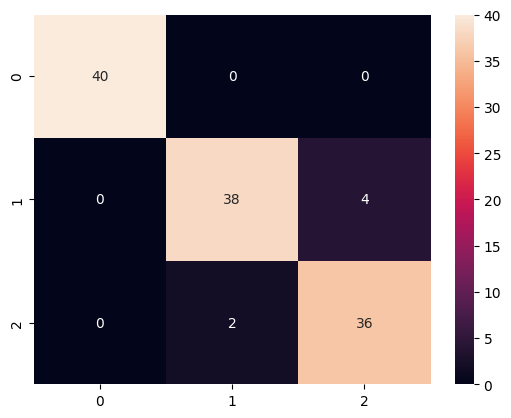

In [24]:
# heatmap of confusion matrix

cm_dtree=confusion_matrix(y_test, y_pred_dtree)
sns.heatmap(cm_dtree, annot=True)

In [25]:
rep=classification_report(y_test, y_pred_dtree)
rep

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        40\n           2       0.95      0.90      0.93        42\n           3       0.90      0.95      0.92        38\n\n    accuracy                           0.95       120\n   macro avg       0.95      0.95      0.95       120\nweighted avg       0.95      0.95      0.95       120\n'

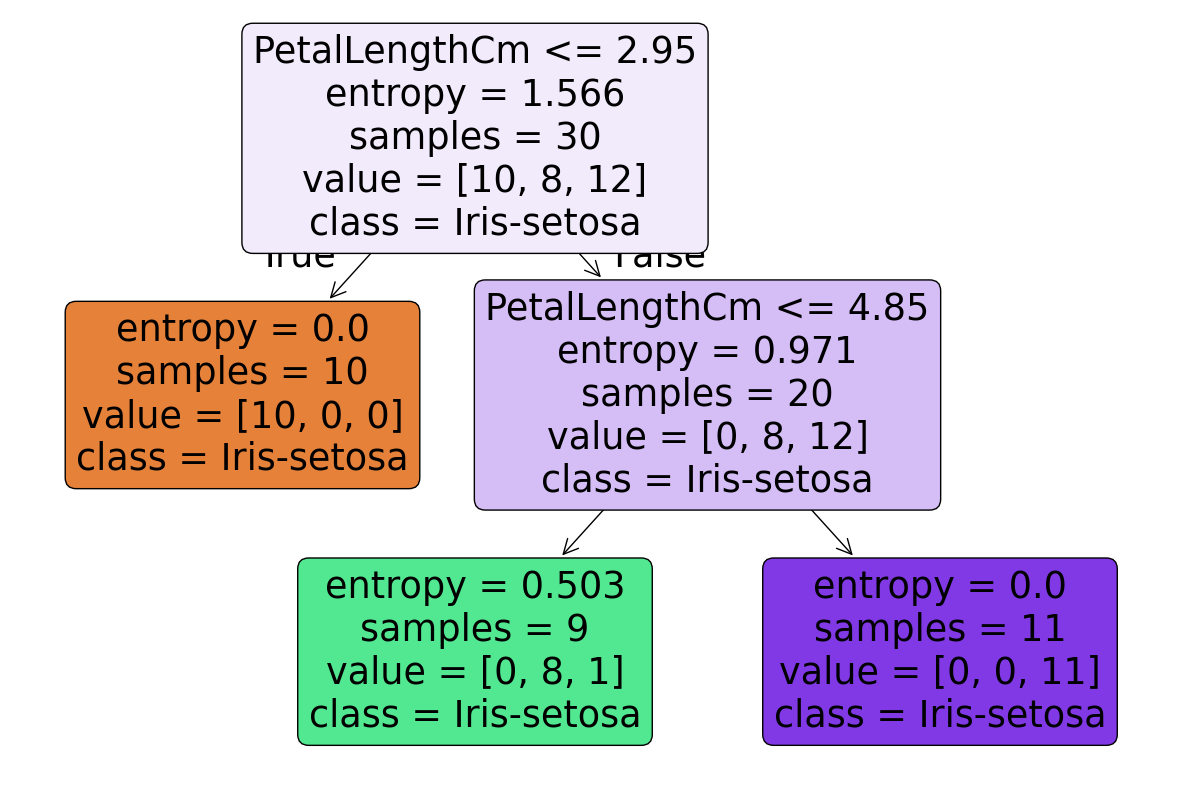

In [26]:
# plot of decision tree

data['Species']=data['Species'].replace({1:'Iris-setosa', 2:'Iris-versicolor', 3:'Iris-virginica'})
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_entropy, filled=True, feature_names=x_train.columns, class_names= data['Species'], rounded=True)
plt.show()